Multistage Dividend Discount Model

- get long term otput forecast data
- get dividend growth, and earnings
- calculate short term expected returns, plot

In [1]:
using DataFrames, TimeSeries, XLSX
using StatsBase
using Plots


In [76]:
df = DataFrame(XLSX.readtable("../data/usa_macro_data_s.xlsx", "Quarterly", infer_eltypes=true))
data_source = collapse(TimeArray(df; timestamp = :observation_date), Dates.year, first)
#data_source = TimeArray(df; timestamp = :observation_date)

div_growth = percentchange(data_source[:Dividend])

dy = data_source[:Dividend] ./ data_source[:Stock_Price]

sr = from(data_source[:TB3MS], Date(1971, 12, 31))

initial_div_growth = to(div_growth, Date(1971, 12, 31)) 

div_growth = from(div_growth, Date(1971, 12, 31))

dy = from(dy, Date(1971, 12, 31))

cpi = percentchange(data_source[:GDPDEF], :log)
gdp = percentchange(data_source[:A939RX0Q048SBEA], :log)

real_gdp = gdp .+ cpi
div_growth

33×1 TimeArray{Float64, 1, Date, Vector{Float64}} 1992-01-01 to 2024-01-01
┌────────────┬────────────┐
│            │ Dividend   │
├────────────┼────────────┤
│ 1992-01-01 │ 0.00435931 │
│ 1993-01-01 │  0.0135749 │
│ 1994-01-01 │  0.0176754 │
│ 1995-01-01 │  0.0405236 │
│ 1996-01-01 │  0.0619651 │
│ 1997-01-01 │  0.0721599 │
│ 1998-01-01 │  0.0395357 │
│ 1999-01-01 │  0.0491453 │
│     ⋮      │     ⋮      │
│ 2018-01-01 │  0.0756175 │
│ 2019-01-01 │  0.0987041 │
│ 2020-01-01 │  0.0841607 │
│ 2021-01-01 │ -0.0217337 │
│ 2022-01-01 │  0.0621822 │
│ 2023-01-01 │   0.103088 │
│ 2024-01-01 │  0.0423593 │
└────────────┴────────────┘
            18 rows omitted

In [61]:
TimeArray(timestamp(gn_mav48), fill(values(gn_avg)[1], length(gn_mav48)))

84×1 TimeArray{Float64, 1, Date, Vector{Float64}} 2003-10-01 to 2024-07-01
┌────────────┬─────────┐
│            │ A       │
├────────────┼─────────┤
│ 2003-10-01 │ 3.83216 │
│ 2004-01-01 │ 3.83216 │
│ 2004-04-01 │ 3.83216 │
│ 2004-07-01 │ 3.83216 │
│ 2004-10-01 │ 3.83216 │
│ 2005-01-01 │ 3.83216 │
│ 2005-04-01 │ 3.83216 │
│ 2005-07-01 │ 3.83216 │
│     ⋮      │    ⋮    │
│ 2023-01-01 │ 3.83216 │
│ 2023-04-01 │ 3.83216 │
│ 2023-07-01 │ 3.83216 │
│ 2023-10-01 │ 3.83216 │
│ 2024-01-01 │ 3.83216 │
│ 2024-04-01 │ 3.83216 │
│ 2024-07-01 │ 3.83216 │
└────────────┴─────────┘
         69 rows omitted

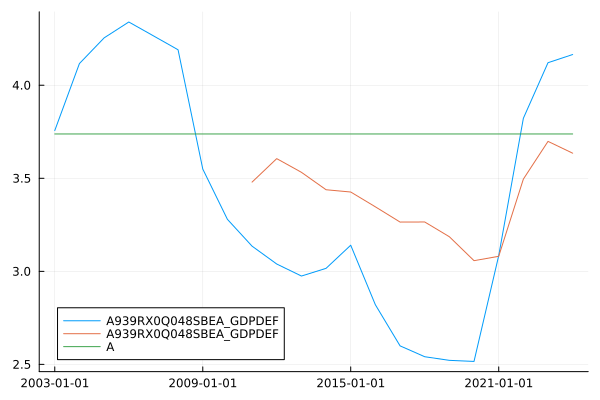

In [66]:
gn_avg = mean(real_gdp) .* 100
gn_mav48 = moving(mean, real_gdp, 12) .* 100
gn_mav80 = moving(mean, real_gdp, 20) .* 100

plot(gn_mav48)
plot!(gn_mav80)
plot!(TimeArray(timestamp(gn_mav48), fill(values(gn_avg)[1], length(gn_mav48))))

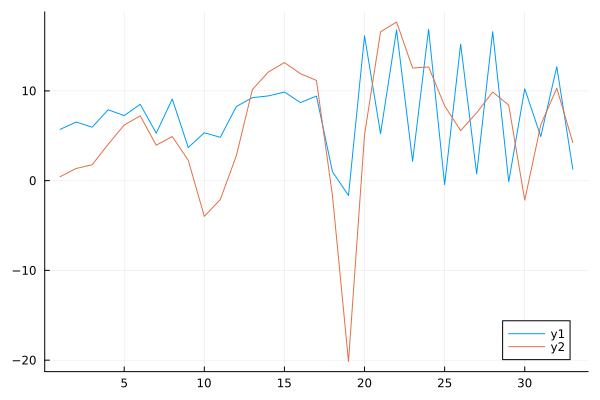

In [67]:
Θ = 0.4
gd = div_growth .- values(mean(div_growth))

ge = zeros(length(gd))

for t in 2:length(gd)
    ge[t] = (1-Θ) .* (values(div_growth[t]))[1] .- values(ge[t-1]) 
end

ge = (ge .+ values(mean(div_growth))) .* 100

plot(ge)
plot!(values(div_growth) .* 100)

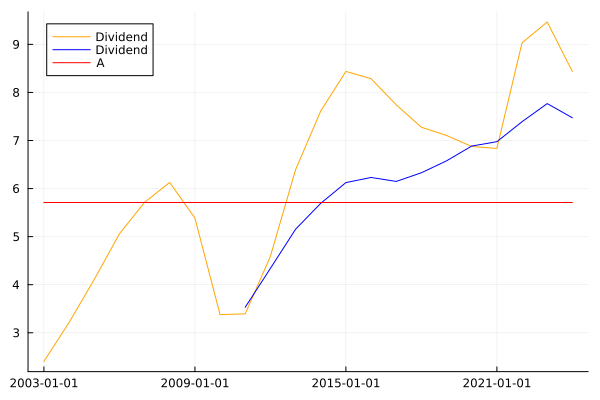

In [77]:
d_avg = mean(div_growth) .* 100
d_mav48 = moving(mean, div_growth, 12) .* 100
d_mav80 = moving(mean, div_growth, 20) .* 100

plot(d_mav48; color=:orange)
plot!(d_mav80; color=:blue)
plot!(TimeArray(timestamp(d_mav48), fill(values(d_avg)[1], length(d_mav48))); color=:red)
#plot!(div_growth .* 100)